Data assignment

Car data:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
file_path = 'IEA-EV-dataEV salesHistoricalCars.csv'
df_cars = pd.read_csv(file_path)
df_cars

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
3793,World,Historical,EV stock,Cars,BEV,2023,Vehicles,2.800000e+07
3794,World,Historical,EV sales,Cars,BEV,2023,Vehicles,9.500000e+06
3795,World,Historical,EV stock,Cars,FCEV,2023,Vehicles,6.600000e+04
3796,World,Historical,EV sales,Cars,PHEV,2023,Vehicles,4.300000e+06


In [36]:
df_cars_sales = df_cars[(df_cars['parameter'] == 'EV sales')]

In [37]:
df_cars_ev = df_cars_sales.drop(df_cars_sales[(df_cars_sales['powertrain'] == 'FCEV') 
                                | (df_cars_sales['region'] == 'World') 
                                | (df_cars_sales['region'] == 'EU27') 
                                | (df_cars_sales['region'] == 'Europe')
                                | (df_cars_sales['region'] == 'Rest of the world')].index)

df_cars_ev

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0
10,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0
14,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0
...,...,...,...,...,...,...,...,...
3621,USA,Historical,EV sales,Cars,BEV,2021,Vehicles,470000.0
3622,USA,Historical,EV sales,Cars,BEV,2022,Vehicles,800000.0
3627,USA,Historical,EV sales,Cars,PHEV,2022,Vehicles,190000.0
3637,USA,Historical,EV sales,Cars,PHEV,2023,Vehicles,290000.0


In [38]:
file_path = 'IEA-EV-dataEV salesHistoricalTrucks.csv'
df_trucks = pd.read_csv(file_path)
df_trucks

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV stock,Trucks,BEV,2010,Vehicles,2.0000
1,Belgium,Historical,EV stock share,Trucks,EV,2010,percent,0.0013
2,Belgium,Historical,EV stock share,Trucks,EV,2011,percent,0.0040
3,Belgium,Historical,EV stock,Trucks,BEV,2011,Vehicles,6.0000
4,Belgium,Historical,EV sales share,Trucks,EV,2011,percent,0.0098
...,...,...,...,...,...,...,...,...
1023,World,Historical,EV stock,Trucks,FCEV,2023,Vehicles,11000.0000
1024,World,Historical,EV stock,Trucks,PHEV,2023,Vehicles,1300.0000
1025,World,Historical,EV sales,Trucks,BEV,2023,Vehicles,53000.0000
1026,World,Historical,EV stock,Trucks,BEV,2023,Vehicles,330000.0000


In [39]:
df_trucks_sales = df_trucks[(df_trucks['parameter'] == 'EV sales')]

In [40]:
df_trucks_ev = df_trucks_sales.drop(df_trucks_sales[(df_trucks_sales['powertrain'] == 'FCEV') 
                                | (df_trucks_sales['region'] == 'World') 
                                | (df_trucks_sales['region'] == 'EU27') 
                                | (df_trucks_sales['region'] == 'Europe')
                                | (df_trucks_sales['region'] == 'Rest of the world')].index)

df_trucks_ev

,region,category,parameter,mode,powertrain,year,unit,value
5,Belgium,Historical,EV sales,Trucks,BEV,2011,Vehicles,1.0
13,Belgium,Historical,EV sales,Trucks,BEV,2014,Vehicles,1.0
19,Belgium,Historical,EV sales,Trucks,BEV,2016,Vehicles,1.0
25,Belgium,Historical,EV sales,Trucks,BEV,2018,Vehicles,1.0
31,Belgium,Historical,EV sales,Trucks,BEV,2020,Vehicles,6.0
...,...,...,...,...,...,...,...,...
879,United Kingdom,Historical,EV sales,Trucks,BEV,2019,Vehicles,20.0
886,United Kingdom,Historical,EV sales,Trucks,BEV,2020,Vehicles,16.0
887,United Kingdom,Historical,EV sales,Trucks,BEV,2021,Vehicles,140.0
894,United Kingdom,Historical,EV sales,Trucks,BEV,2022,Vehicles,510.0


<h1>Plots RQ1: What is the development of fully electric sales and plyg-in hybrid sales of electric cars and electric trucks?</h2>

Cars data preparation

In [41]:
df_cars_ev_BEV = df_cars_ev[df_cars_ev['powertrain'] == 'BEV']
df_grouped_cars_BEV = df_cars_ev_BEV.groupby('year')
df_grouped_total_value_cars_BEV = df_grouped_cars_BEV['value'].sum().reset_index()

df_cars_ev_PHEV = df_cars_ev[df_cars_ev['powertrain'] == 'PHEV']
df_grouped_cars_PHEV = df_cars_ev_PHEV.groupby('year')
df_grouped_total_value_cars_PHEV = df_grouped_cars_PHEV['value'].sum().reset_index()


Trucks data preparation

In [42]:
df_trucks_ev_BEV = df_trucks_ev[df_trucks_ev['powertrain'] == 'BEV']
df_grouped_trucks_BEV = df_trucks_ev_BEV.groupby('year')
df_grouped_total_value_trucks_BEV = df_grouped_trucks_BEV['value'].sum().reset_index()

df_trucks_ev_PHEV = df_trucks_ev[df_trucks_ev['powertrain'] == 'PHEV']
df_grouped_trucks_PHEV = df_trucks_ev_PHEV.groupby('year')
df_grouped_total_value_trucks_PHEV = df_grouped_trucks_PHEV['value'].sum().reset_index()


Figure plot final

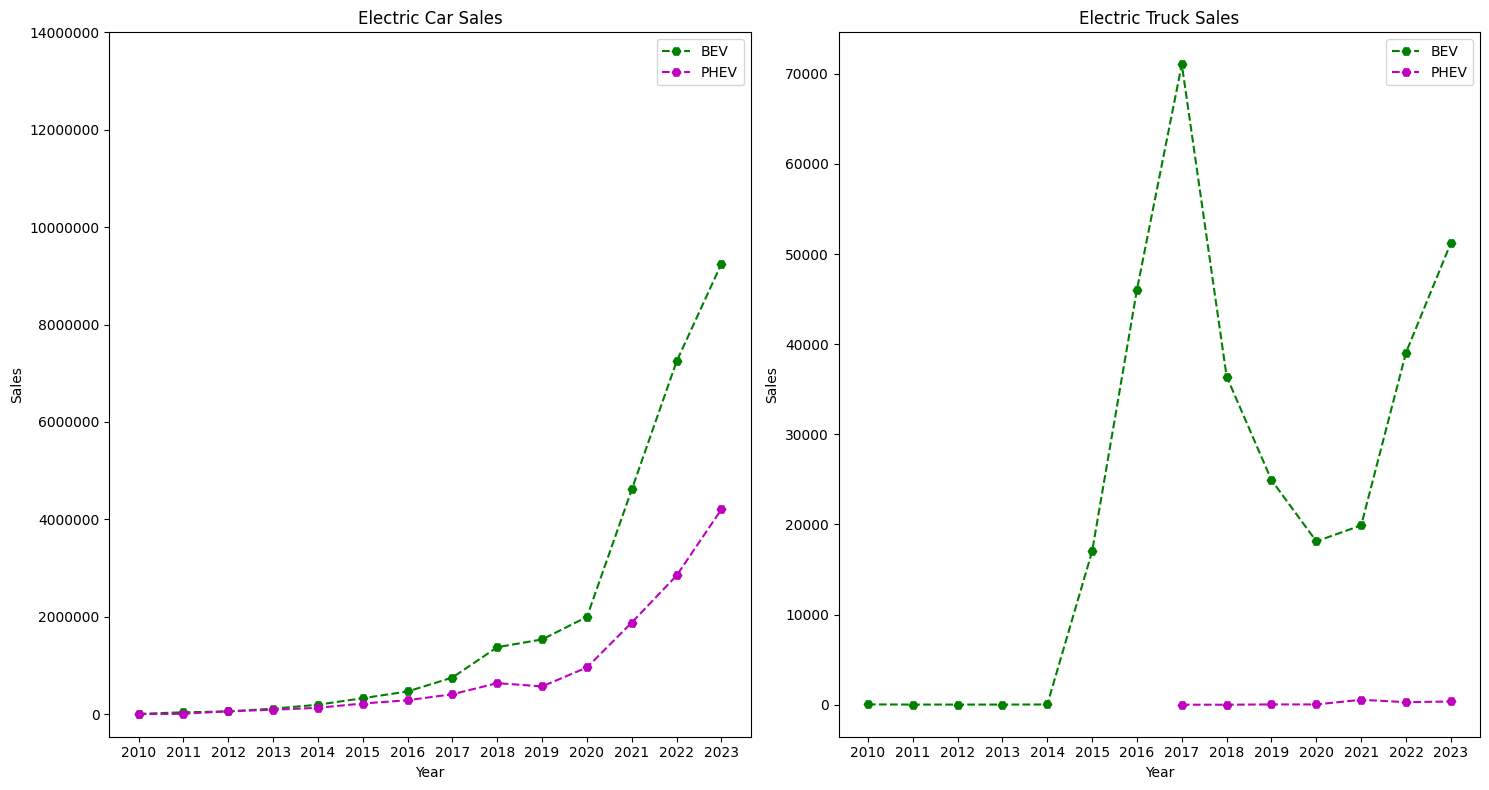

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.plot(df_grouped_total_value_cars_BEV['year'], df_grouped_total_value_cars_BEV['value'], label='BEV', marker='H', linestyle="--", color = 'g')
ax1.plot(df_grouped_total_value_cars_PHEV['year'], df_grouped_total_value_cars_PHEV['value'], label='PHEV', marker='H', linestyle="--", color = 'm')
ax1.set_title('Electric Car Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax1.set_yticks(range(0, 15000000, 2000000)) 
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_xticks(df_grouped_total_value_cars_BEV['year'])
ax1.legend()

ax2.plot(df_grouped_total_value_trucks_BEV['year'], df_grouped_total_value_trucks_BEV['value'], label='BEV', marker='H', linestyle="--", color = 'g')
ax2.plot(df_grouped_total_value_trucks_PHEV['year'], df_grouped_total_value_trucks_PHEV['value'], label='PHEV', marker='H', linestyle="--", color = 'm')
ax2.set_title('Electric Truck Sales')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales')
ax2.set_xticks(df_grouped_total_value_trucks_BEV['year'])
ax2.legend() 

plt.tight_layout()
plt.show()

Explanation graph above:
We set the y-axis of the two graphs on purpose not the same because the trucks sales are much lower and become one straight line if we set it to the axis of the first graph. Therefore, we dicided to set two different y-axis for the graphs.